<a href="https://colab.research.google.com/github/JSJeong-me/RPA-2023/blob/main/Time_Series/0814-GPT-ETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from io import StringIO

# 데이터
data = """
Unnamed: 0,Time,Value,Max Value,Date,TS
0,00:15,43.68,174.72,2019-05-01,2019-05-01 00:15:00
1,00:30,42.36,169.44,2019-05-01,2019-05-01 00:30:00
2,00:45,41.4,165.6,2019-05-01,2019-05-01 00:45:00
3,01:00,39.96,159.84,2019-05-01,2019-05-01 01:00:00
4,01:15,41.04,164.16,2019-05-01,2019-05-01 01:15:00
5,01:30,41.28,165.12,2019-05-01,2019-05-01 01:30:00
6,01:45,40.92,163.68,2019-05-01,2019-05-01 01:45:00
7,02:00,39.96,159.84,2019-05-01,2019-05-01 02:00:00
8,02:15,38.88,155.52,2019-05-01,2019-05-01 02:15:00
9,02:30,36.48,145.92,2019-05-01,2019-05-01 02:30:00
10,02:45,36.6,146.4,2019-05-01,2019-05-01 02:45:00
11,03:00,36.72,146.88,2019-05-01,2019-05-01 03:00:00
"""

# 데이터를 DataFrame으로 변환
df = pd.read_csv(StringIO(data))

# 'TS' 열을 인덱스로 설정
df.set_index('TS', inplace=True)

# 'Value' 열만 선택
value_df = df[['Value']]

print(value_df)


                     Value
TS                        
2019-05-01 00:15:00  43.68
2019-05-01 00:30:00  42.36
2019-05-01 00:45:00  41.40
2019-05-01 01:00:00  39.96
2019-05-01 01:15:00  41.04
2019-05-01 01:30:00  41.28
2019-05-01 01:45:00  40.92
2019-05-01 02:00:00  39.96
2019-05-01 02:15:00  38.88
2019-05-01 02:30:00  36.48
2019-05-01 02:45:00  36.60
2019-05-01 03:00:00  36.72


In [ ]:
import pandas as pd

# Load the Excel file from Google Drive (you'll need to download it first)
file_path = 'https://docs.google.com/spreadsheets/d/1m8gpTgamUHuRxusnRQ5mmQ2s5XjtbDgt/edit#gid=1566095730'  # Replace with the path to your downloaded file

df = pd.read_excel(file_path)

# Set the 'TS' column as the index
df.set_index('TS', inplace=True)

# Print the 'Value' column
print(df['Value'])


In [3]:
import gdown
import pandas as pd

# Extract the file ID from the Google Drive link
url = "https://docs.google.com/spreadsheets/d/18Qr23SUFtJ-jBPw76v_YkE0CgAI8Df0U/edit?usp=sharing"
file_id = url.split("/")[5]

# Construct the gdown URL and download the file
gdown_url = f"https://drive.google.com/uc?export=download&id={file_id}"
gdown.download(gdown_url, 'datapower_demand_dataset.xlsx', quiet=False)

# Read the downloaded xlsx file into a pandas dataframe
data = pd.read_excel('datapower_demand_dataset.xlsx')

# Display the first few rows of the dataframe
print(data.head())


Downloading...
From: https://drive.google.com/uc?export=download&id=18Qr23SUFtJ-jBPw76v_YkE0CgAI8Df0U
To: /content/datapower_demand_dataset.xlsx
100%|██████████| 2.11M/2.11M [00:00<00:00, 156MB/s]


   Unnamed: 0.1  Unnamed: 0   Time   Value  Max Value        Date  \
0             0           0  00:15  135.12     540.48  2019-03-01   
1             1           1  00:30  131.28     525.12  2019-03-01   
2             2           2  00:45  129.60     518.40  2019-03-01   
3             3           3  01:00  126.48     505.92  2019-03-01   
4             4           4  01:15  123.36     493.44  2019-03-01   

                   TS  
0 2019-03-01 00:15:00  
1 2019-03-01 00:30:00  
2 2019-03-01 00:45:00  
3 2019-03-01 01:00:00  
4 2019-03-01 01:15:00  


In [4]:
data.index

RangeIndex(start=0, stop=53567, step=1)

In [5]:
# Assuming you've already read the dataframe into the variable 'data'

# Get the dimension of the dataframe
print("Dimension of the dataframe:", data.shape)

# Get descriptive statistics on the columns
print("\nDescriptive Statistics:")
print(data.describe())

# Get data types of various columns
print("\nData Types of Columns:")
print(data.dtypes)


Dimension of the dataframe: (53567, 7)

Descriptive Statistics:
       Unnamed: 0.1    Unnamed: 0         Value     Max Value
count  53567.000000  53567.000000  53567.000000  53567.000000
mean   26783.000000     47.499113    188.087015    752.348059
std    15463.605272     27.711067     63.083298    252.333190
min        0.000000      0.000000     26.400000    105.600000
25%    13391.500000     23.500000    138.240000    552.960000
50%    26783.000000     47.000000    178.560000    714.240000
75%    40174.500000     71.000000    225.120000    900.480000
max    53566.000000     95.000000    393.360000   1573.440000

Data Types of Columns:
Unnamed: 0.1             int64
Unnamed: 0               int64
Time                    object
Value                  float64
Max Value              float64
Date                    object
TS              datetime64[ns]
dtype: object


In [6]:
# "TS" 열을 인덱스로 설정
data.set_index('TS', inplace=True)

# "Value" 열의 값을 출력
print(data['Value'])

TS
2019-03-01 00:15:00    135.12
2019-03-01 00:30:00    131.28
2019-03-01 00:45:00    129.60
2019-03-01 01:00:00    126.48
2019-03-01 01:15:00    123.36
                        ...  
2020-09-08 22:45:00    157.68
2020-09-08 23:00:00    153.60
2020-09-08 23:15:00    149.04
2020-09-08 23:30:00    143.52
2020-09-08 23:45:00    139.44
Name: Value, Length: 53567, dtype: float64


In [7]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Time', 'Value', 'Max Value', 'Date'], dtype='object')

In [8]:
data.index

DatetimeIndex(['2019-03-01 00:15:00', '2019-03-01 00:30:00',
               '2019-03-01 00:45:00', '2019-03-01 01:00:00',
               '2019-03-01 01:15:00', '2019-03-01 01:30:00',
               '2019-03-01 01:45:00', '2019-03-01 02:00:00',
               '2019-03-01 02:15:00', '2019-03-01 02:30:00',
               ...
               '2020-09-08 21:30:00', '2020-09-08 21:45:00',
               '2020-09-08 22:00:00', '2020-09-08 22:15:00',
               '2020-09-08 22:30:00', '2020-09-08 22:45:00',
               '2020-09-08 23:00:00', '2020-09-08 23:15:00',
               '2020-09-08 23:30:00', '2020-09-08 23:45:00'],
              dtype='datetime64[ns]', name='TS', length=53567, freq=None)

In [9]:
# 지정된 열들을 삭제
columns_to_drop = ['Unnamed: 0.1', 'Unnamed: 0', 'Time', 'Max Value', 'Date']
data.drop(columns=columns_to_drop, inplace=True)

# 결과를 확인하기 위해 데이터프레임의 처음 몇 행을 출력
print(data.head())

                      Value
TS                         
2019-03-01 00:15:00  135.12
2019-03-01 00:30:00  131.28
2019-03-01 00:45:00  129.60
2019-03-01 01:00:00  126.48
2019-03-01 01:15:00  123.36


In [11]:
# # "TS" 열을 datetime 형식으로 변환
# data['TS'] = pd.to_datetime(data['TS'])

# # "TS" 열을 인덱스로 설정
# data.set_index('TS', inplace=True)

# 일별로 "Value" 열 값을 합계
daily_sum = data['Value'].resample('D').sum()

# 결과 출력
print(daily_sum)

TS
2019-03-01    15824.40
2019-03-02    15608.88
2019-03-03    15234.96
2019-03-04    15740.88
2019-03-05    15568.32
                ...   
2020-09-04    18442.08
2020-09-05    18112.08
2020-09-06    17171.28
2020-09-07    14864.88
2020-09-08    16439.76
Freq: D, Name: Value, Length: 558, dtype: float64


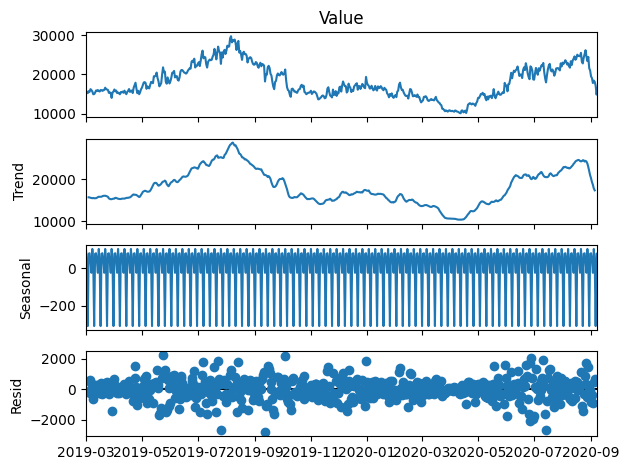

In [12]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'daily_sum' is already defined as per previous instructions

# ETS 분석 수행
result = sm.tsa.seasonal_decompose(daily_sum, model='additive')

# 결과 시각화
result.plot()
plt.show()


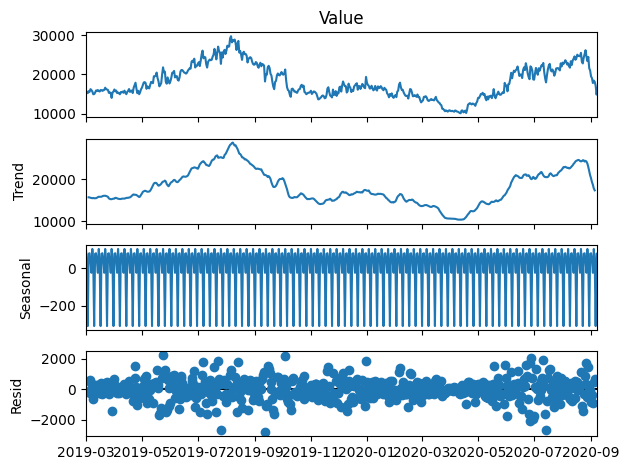

In [15]:
# ETS 분석 수행
result = sm.tsa.seasonal_decompose(daily_sum, model='additive')

# 결과 시각화
fig = result.plot()

# 그래프를 result.png로 저장
fig.savefig('result.png')